# New Product Sales Methods Analysis

## About the Project

Six weeks ago, we launched a new line of office stationery, and we tested three different sales strategies - targeted email, phone calls, and a combination of both.

## Business Goals

As these methods vary in their demand on the team's time, our business goal was to determine the differences between them and to identify the most effective sales approach that we should continue using.

## Importing and Cleaning Data

In [36]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

product_sales = pd.read_csv('product_sales.csv')
product_sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [37]:
# Information about DataFrame
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


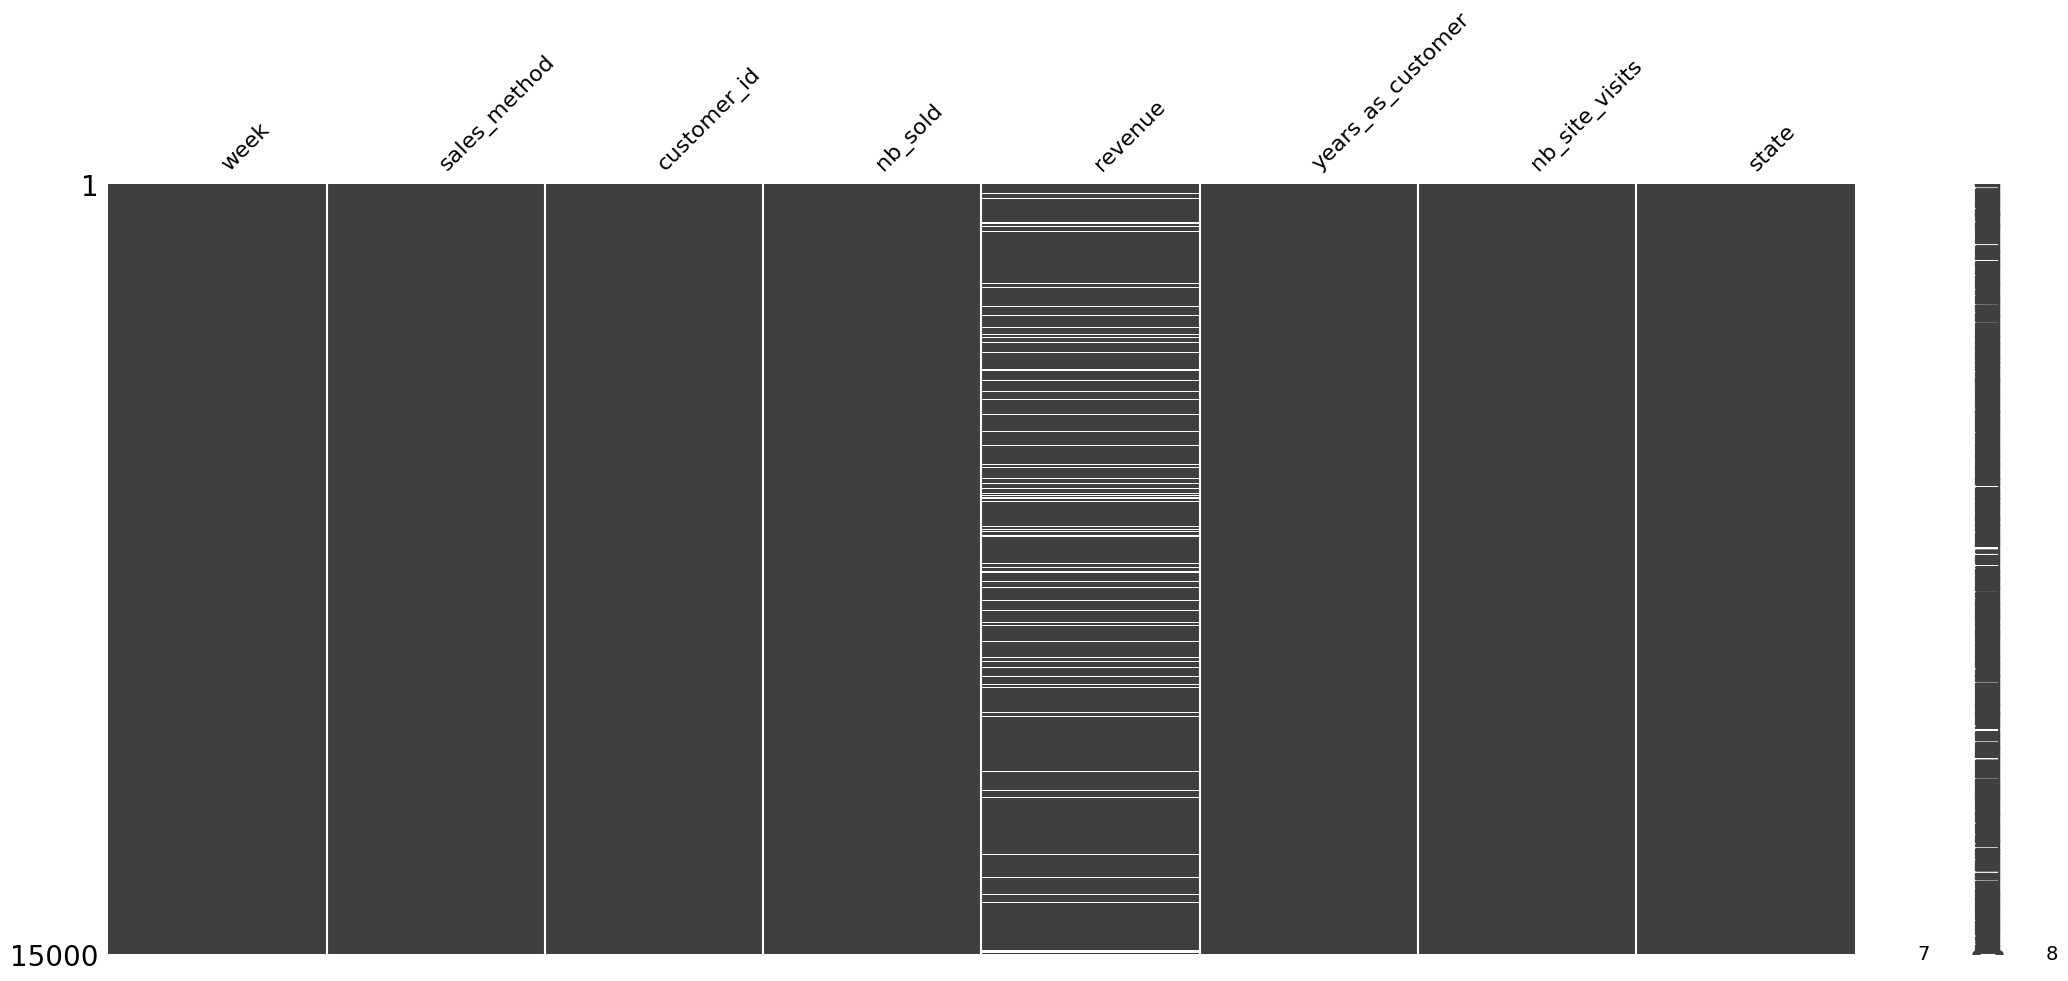

In [4]:
#Checking if data missing at random
msno.matrix(product_sales)
plt.savefig('nulls.png', bbox_inches='tight')

In [38]:
# Checking unique names of methods
product_sales['sales_method'] = product_sales['sales_method'].apply(lambda x: x.lower())
product_sales['sales_method'].unique()

array(['email', 'email + call', 'call', 'em + call'], dtype=object)

In [39]:
# Standartizing names of methods
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call', 'email + call')
product_sales['sales_method'].unique()

array(['email', 'email + call', 'call'], dtype=object)

In [9]:
# Checking if every id follows the same pattern
len(product_sales['customer_id'].str.match('^[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}'))

15000

In [10]:
# Checking week values
product_sales['week'].sort_values().unique()

array([1, 2, 3, 4, 5, 6])

In [11]:
# Checking number of site visits values
product_sales['nb_site_visits'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 41])

In [12]:
# Checking number of sold items values
product_sales['nb_sold'].sort_values().unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [59]:
# Checking state values
product_sales['state'].sort_values().unique() 

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [40]:
# Checking if there are values out of range 
years = dt.date.today().year - 1984
out_of_range = product_sales[product_sales['years_as_customer'] > years]
out_of_range

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [41]:
# Dropping rows with out of range values
product_sales = product_sales.drop(out_of_range.index)
len(product_sales)

14998

## Calculating a new metric

In [52]:
# Calculating price of products
product_sales['price'] = round((product_sales['revenue'] / product_sales['nb_sold']), 2)
product_sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,price
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona,NaN
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,15.03
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,4.78
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana,NaN
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,10.05
...,...,...,...,...,...,...,...,...,...
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania,5.08
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas,5.23
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia,4.98
14998,6,call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey,4.99


In [53]:
# Creating a DataFrame without null values
product_sales_notna = product_sales[product_sales['revenue'].notna()]
product_sales_notna

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,price
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,15.03
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,4.78
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,10.05
5,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi,5.00
6,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia,10.31
...,...,...,...,...,...,...,...,...,...
14994,4,email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio,9.94
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania,5.08
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas,5.23
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia,4.98


In [54]:
# Comparing descriptive statistics with and without null values
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits,price
count,14998.00000,14998.000000,13924.000000,14998.000000,14998.000000,13924.000000
mean,3.09828,10.084678,93.937828,4.959261,24.990799,9.099415
std,1.65649,1.812334,47.437281,5.011237,3.501100,3.451886
min,1.00000,7.000000,32.540000,0.000000,12.000000,4.650000
25%,2.00000,9.000000,52.470000,1.000000,23.000000,5.140000
50%,3.00000,10.000000,89.500000,3.000000,25.000000,9.790000
75%,5.00000,11.000000,107.330000,7.000000,27.000000,10.360000
max,6.00000,16.000000,238.320000,39.000000,41.000000,15.920000


In [55]:
product_sales_notna.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits,price
count,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000
mean,3.078282,10.040075,93.937828,4.971775,24.946926,9.099415
std,1.650725,1.789819,47.437281,5.011542,3.491690,3.451886
min,1.000000,7.000000,32.540000,0.000000,12.000000,4.650000
25%,1.000000,9.000000,52.470000,1.000000,23.000000,5.140000
50%,3.000000,10.000000,89.500000,3.000000,25.000000,9.790000
75%,4.000000,11.000000,107.330000,7.000000,27.000000,10.360000
max,6.000000,16.000000,238.320000,39.000000,37.000000,15.920000


## What differences are there between the sales method groups?

In [44]:
# How many customers were there for each approach?
nb_customer = product_sales_notna.groupby('sales_method')['customer_id'].count().reset_index(name='count')
nb_customer

,sales_method,count
0,call,4780
1,email,6921
2,email + call,2223


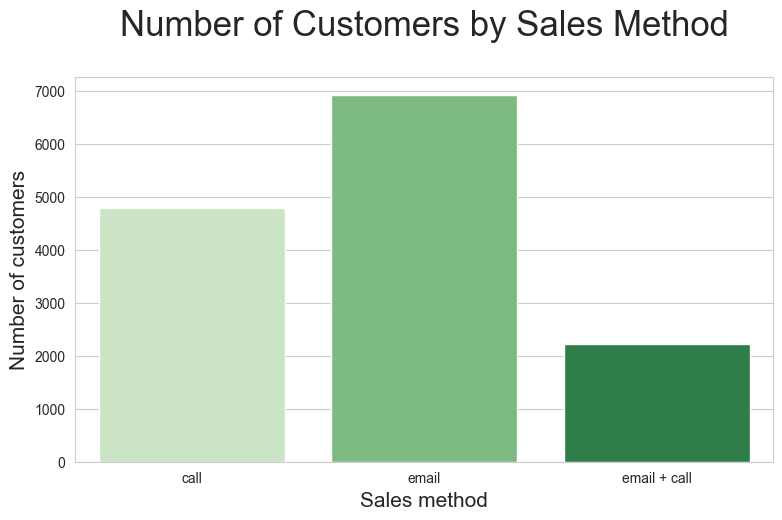

In [57]:
# Creating a barplot
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=nb_customer, x='sales_method', y='count', palette='Greens', ax=ax)
sns.set_style("whitegrid")
plt.title('Number of Customers by Sales Method', fontsize=25, pad=30)
plt.xlabel('Sales method', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.savefig('nb_cust_method.png', bbox_inches='tight')
plt.show()

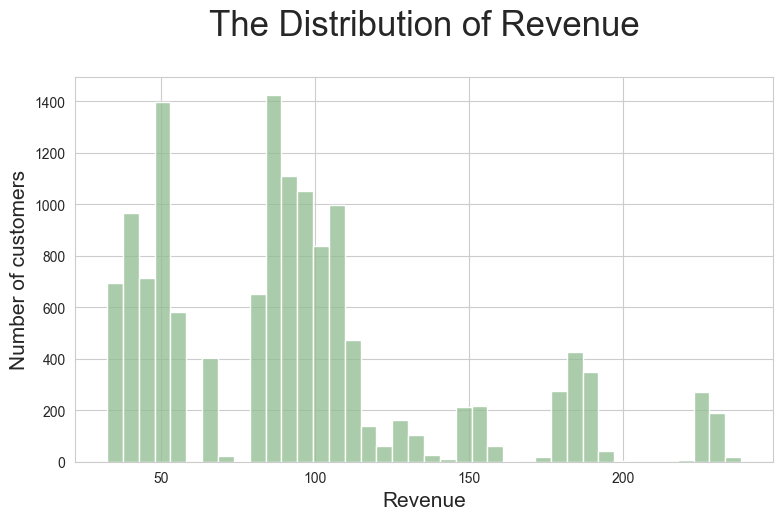

In [46]:
# What does the spread of the revenue look like overall?
fig, ax = plt.subplots(figsize=(9, 5))
sns.histplot(data=product_sales_notna, x='revenue', color='darkseagreen', ax=ax, bins=40)
sns.set_style("whitegrid")
plt.title('The Distribution of Revenue', fontsize=25, pad=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.savefig('rev_spread_overall.png', bbox_inches='tight')
plt.show()

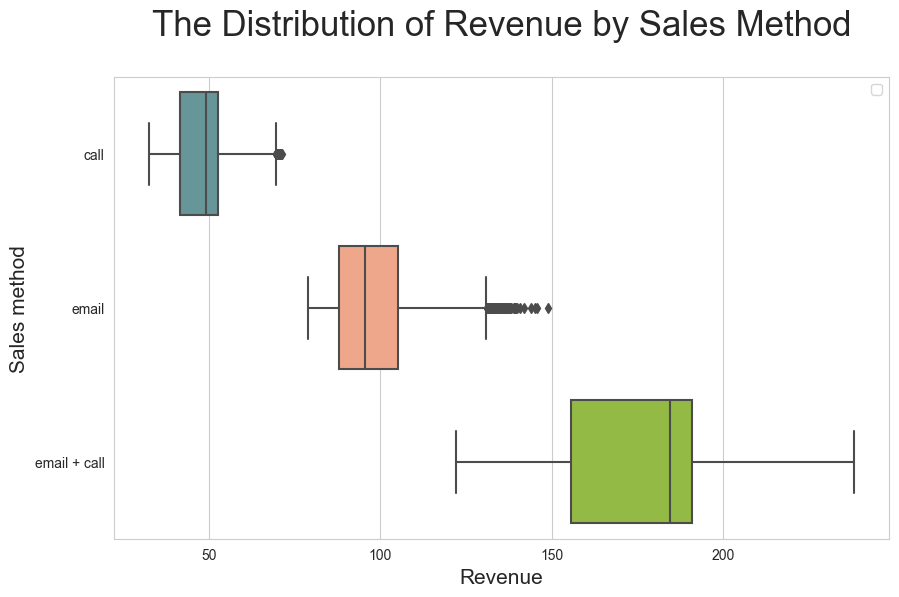

In [47]:
# What does the spread of the revenue look like for each method?
plt.figure(figsize=(10,6))
sns.boxplot(data=product_sales_notna.sort_values('sales_method'), 
            x='revenue', y='sales_method', 
            palette=['cadetblue', 'lightsalmon', 'yellowgreen'])
sns.set_style("whitegrid")
plt.title('The Distribution of Revenue by Sales Method', fontsize=25, pad=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Sales method', fontsize=15)
plt.legend()
plt.savefig('rev_spread_method_box.png', bbox_inches='tight')
plt.show()

In [49]:
# Calculating revenue for each method
revenue = product_sales_notna.groupby('sales_method')['revenue'].sum().reset_index(name='sum')
revenue

,sales_method,sum
0,call,227513.02
1,email,672220.61
2,email + call,408256.69


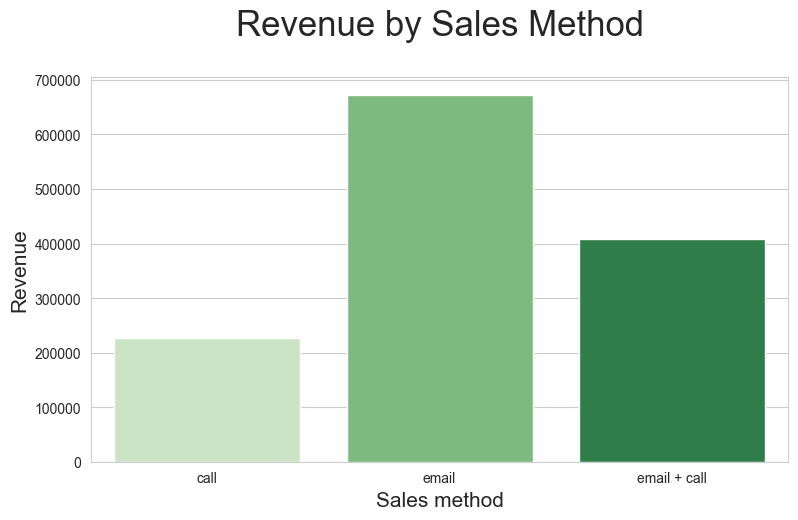

In [50]:
# Visualizing revenue for each method
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=revenue, x='sales_method', y='sum', palette='Greens', ax=ax)
sns.set_style("whitegrid")
plt.title('Revenue by Sales Method', fontsize=25, pad=30)
plt.xlabel('Sales method', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.savefig('total_revenue.png', bbox_inches='tight')
plt.show()

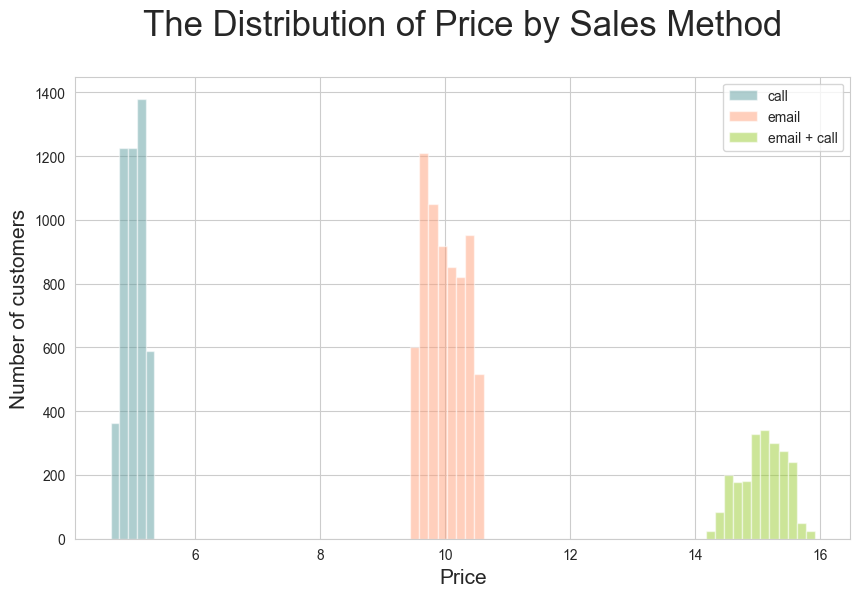

In [58]:
# Visualazing prices for each method
plt.figure(figsize=(10,6))
plt.hist(product_sales_notna[product_sales['sales_method'] == 'call']['price'], bins=5, 
         alpha=0.5, label="call", color='cadetblue')
plt.hist(product_sales_notna[product_sales['sales_method'] == 'email']['price'], bins=8, 
         alpha=0.5, label="email", color='lightsalmon')
plt.hist(product_sales_notna[product_sales['sales_method'] == 'email + call']['price'], bins=12, 
         alpha=0.5, label="email + call", color='yellowgreen')
sns.set_style("whitegrid")
plt.title('The Distribution of Price by Sales Method', fontsize=25, pad=30)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.legend()
plt.savefig('price_spread_method.png', bbox_inches='tight')
plt.show()

## Was there any difference in revenue over time for each of the methods?

In [63]:
# Calculating revenue for each method for each week
table_week = pd.pivot_table(product_sales_notna, values='revenue', 
                            index='week', columns='sales_method', aggfunc='sum')
table_week

sales_method,call,email,email + call
week,,,
1,26159.18,229765.55,16885.33
2,33792.02,137794.35,26376.23
3,36247.27,98792.14,48737.14
4,49543.52,107788.37,78296.20
5,53518.11,74373.45,126809.72
6,28252.92,23706.75,111152.07


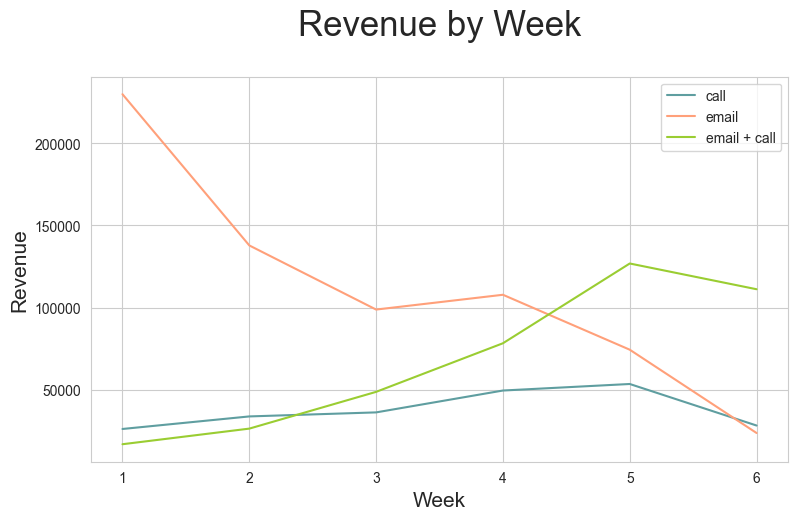

In [68]:
# Visualizing revenue by week for each method
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(data=table_week, x=table_week.index, y='call', label='call', 
             color='cadetblue', ax=ax)
sns.lineplot(data=table_week, x=table_week.index, y='email', 
             ax=ax, label='email', color='lightsalmon')
sns.lineplot(data=table_week, x=table_week.index, y='email + call', 
             ax=ax, label='email + call', color='yellowgreen')
sns.set_style("whitegrid")
plt.title('Revenue by Week', fontsize=25, pad=30)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.legend()
plt.savefig('rev_weeks.png', bbox_inches='tight')
plt.show()

In [65]:
# Calculating revenue by number of site visits for each method
table_visits = pd.pivot_table(product_sales_notna, values='revenue', index='nb_site_visits', columns='sales_method', aggfunc='sum')
table_visits

sales_method,call,email,email + call
nb_site_visits,,,
12,40.95,NaN,NaN
13,109.60,95.72,NaN
14,110.44,267.98,127.24
15,527.23,1358.22,127.37
16,1716.41,2842.14,281.14
17,2302.13,3391.84,770.82
18,4531.55,7886.65,1108.64
19,7531.99,16901.75,3703.96
20,10172.32,26534.67,4937.39


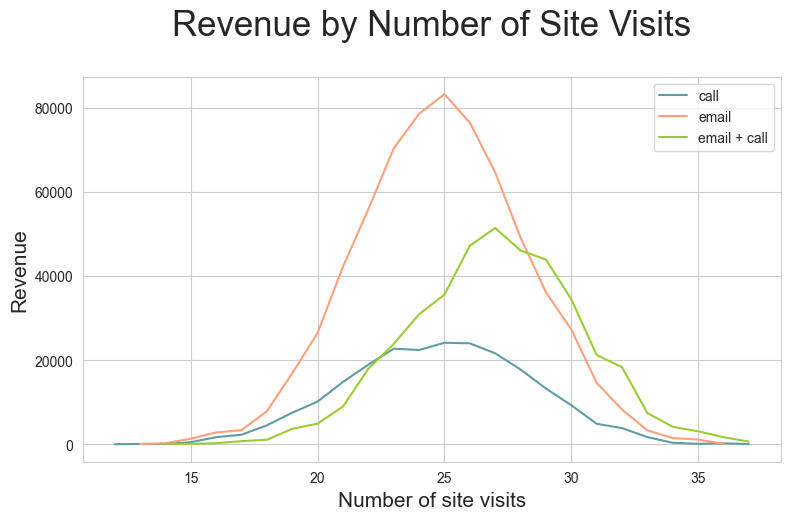

In [66]:
# Visualizing revenue by number of site visits for each method
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(data=table_visits, x=table_visits.index, 
                  ax=ax, y='call', label='call', color='cadetblue')
sns.lineplot(data=table_visits, x=table_visits.index, y='email', 
             ax=ax, label='email', color='lightsalmon')
sns.lineplot(data=table_visits, x=table_visits.index, y='email + call', 
             ax=ax, label='email + call', color='yellowgreen')
sns.set_style("ticks")
plt.title('Revenue by Number of Site Visits', fontsize=25, pad=30)
plt.xlabel('Number of site visits', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.savefig('rev_nb_visits.png', bbox_inches='tight')
plt.show()

In [69]:
# Calculating revenue by years as customer for each method
table_years_as_cust = pd.pivot_table(product_sales_notna, values='revenue', 
                        index='years_as_customer', columns='sales_method', aggfunc='sum')
table_years_as_cust

sales_method,call,email,email + call
years_as_customer,,,
0,19858.93,65192.36,52393.92
1,39832.94,110930.67,72409.36
2,28824.63,91986.29,54494.98
3,25162.68,69849.85,48166.03
4,19302.17,62720.60,34083.75
5,17368.89,49268.48,30226.79
6,14515.56,40670.06,23847.73
7,10272.34,34370.58,15321.47
8,8844.96,27568.29,14058.64


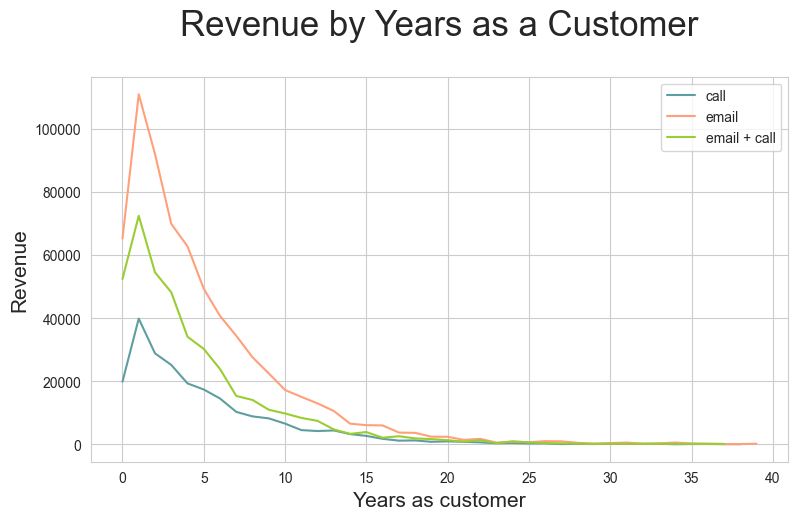

In [70]:
# Visualizing revenue by years as customer for each method
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(data=table_years_as_cust, x=table_years_as_cust.index, y='call', 
                  ax=ax, label='call', color='cadetblue')
sns.lineplot(data=table_years_as_cust, x=table_years_as_cust.index, y='email', 
             ax=ax, label='email', color='lightsalmon')
sns.lineplot(data=table_years_as_cust, x=table_years_as_cust.index, y='email + call', 
             ax=ax, label='email + call', color='yellowgreen')
sns.set_style("whitegrid")
plt.title('Revenue by Years as a Customer', fontsize=25, pad=30)
plt.xlabel('Years as customer', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.legend()
plt.savefig('rev_years_as_cust.png', bbox_inches='tight')
plt.show()

In [71]:
# Calculating a price by state for each method
table_state_p = pd.pivot_table(product_sales_notna, 
                             values='price', index='state', columns='sales_method', 
                             aggfunc='mean').sort_values(['call', 'email', 'email + call'], ascending=False)
table_state_p

sales_method,call,email,email + call
state,,,
Idaho,5.086667,10.100645,14.970769
North Dakota,5.070000,9.939231,15.040000
Utah,5.049429,10.017258,15.022222
Kansas,5.041111,10.055156,15.018000
Nevada,5.038077,10.092727,15.072500
Indiana,5.036827,9.952400,15.112292
Minnesota,5.034368,9.984059,15.091000
Louisiana,5.030000,9.993303,14.964118
Arizona,5.028482,9.965597,15.086939


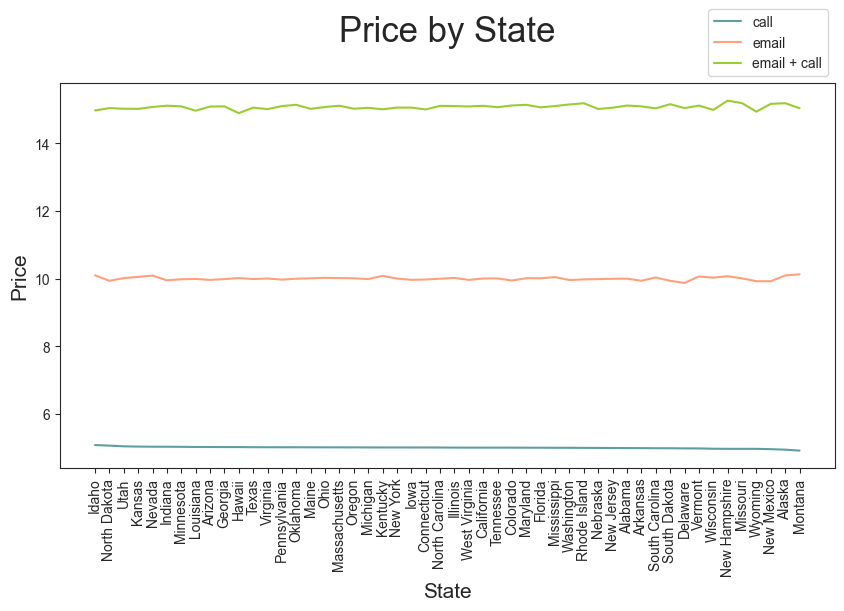

In [73]:
# Visualizing a price by state for each method
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=table_state_p, x=table_state_p.index, y='call', 
             ax=ax, label='call', color='cadetblue')
sns.lineplot(data=table_state_p, x=table_state_p.index, y='email', 
             ax=ax, label='email', color='lightsalmon')
sns.lineplot(data=table_state_p, x=table_state_p.index, y='email + call', 
             ax=ax, label='email + call', color='yellowgreen')
plt.xticks(rotation=90)
sns.set_style("ticks")
plt.title('Price by State', fontsize=25, pad=30)
plt.xlabel('State', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.savefig('price_state.png', bbox_inches='tight')
plt.show()

In [74]:
# Calculating number of customer in each state
nb_customer_state = product_sales.groupby('state')['customer_id'].count().reset_index(name='count')
nb_customer_state

,state,count
0,Alabama,214
1,Alaska,40
2,Arizona,321
3,Arkansas,132
4,California,1870
5,Colorado,230
6,Connecticut,179
7,Delaware,34
8,Florida,904
9,Georgia,489


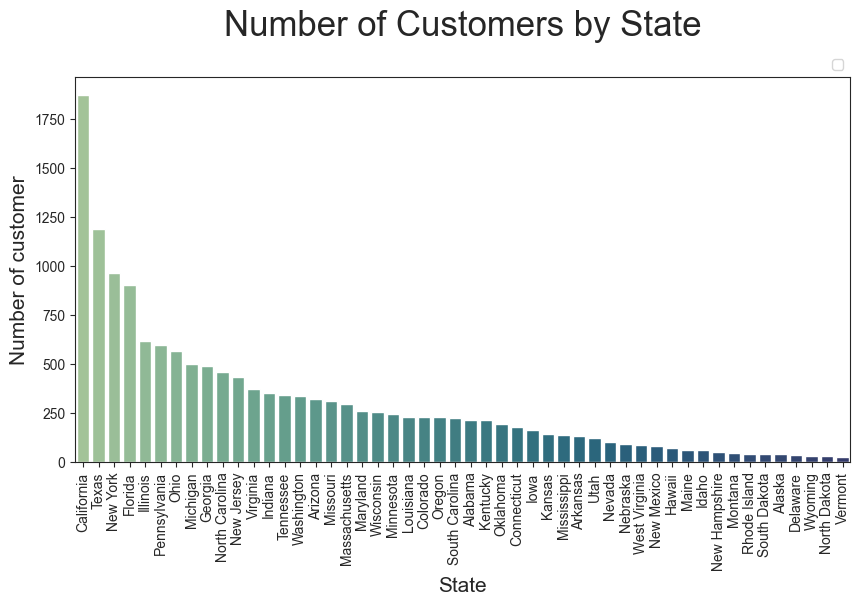

In [75]:
# Visualizing number of customer in each state
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=nb_customer_state.sort_values('count', ascending=False), 
            x='state', y='count', ax=ax, palette='crest')
plt.xticks(rotation=90)
# sns.set_style("ticks")
plt.title('Number of Customers by State', fontsize=25, pad=30)
plt.xlabel('State', fontsize=15)
plt.ylabel('Number of customer', fontsize=15)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.savefig('nb_cust_state.png', bbox_inches='tight')
plt.show()